### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib
import matplotlib.dates as mdates
import seaborn as sb

In [2]:
df = pd.read_csv('data.csv')
pd.options.display.max_columns = 999

### Reorganizing the data - Difficulty and Questions score
We want to change the 1/5 scale to -2/2 so that we can have 0 as an absolute value
This will be useful later on when using Pearson's coefficient of correlation

In [3]:
df

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,1,2,1,1,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
7,1,2,1,1,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
8,1,2,1,1,3,4,4,4,4,4,4,4,4,4,4,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
9,1,2,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [3]:
df.iloc[:, 4:] = df.iloc[:, 4:].apply(lambda x: x - 3)

### Renaming the nb.repeats column name to no.taken 
The name is confusing and can be interpreted that a student has taken the calss already once and this
value represents the number of times that he repeated the class

In [4]:
df.rename(columns={'nb.repeat':'no.taken'}, inplace=True)

### Assessing the class size

In [5]:
# spc means students per class
spc_values = df.groupby(['class']).size().tolist()
spc_labels = df['class'].unique()
spc_labels.sort()
spc_labels= np.array(spc_labels).tolist()

### Creating a pie chart to visualize the class size

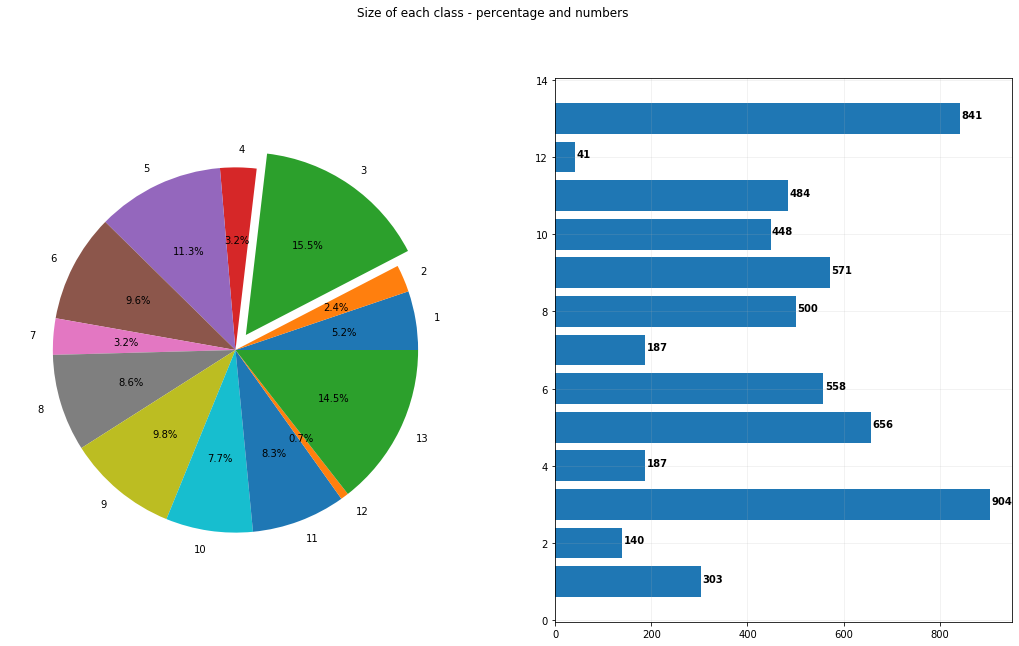

In [6]:
# Organize the data by class
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Size of each class - percentage and numbers')

ax1.pie(spc_values,
       labels=spc_labels,
        explode=(0,0,0.1,0,0,0,0,0,0,0,0,0,0),
       autopct = '%1.1f%%'
       )

ax2.barh(spc_labels, spc_values)
ax2.grid(alpha=0.2)
for i, v in enumerate(spc_values):
    ax2.text(v + 3, i + 1, str(v), color='black', fontweight='bold')

fig = plt.gcf()
fig.set_size_inches(18, 10, forward=True)

### Assessing how many students a teacher has in total

In [7]:
# spt means students per teacher
spt_values = df.groupby(['instr']).size().tolist()
spt_labels = df['instr'].unique()
spt_labels.sort()
spt_labels= np.array(spt_labels).tolist()

### Creating a pie chart to how many students a teacher has in all his classes

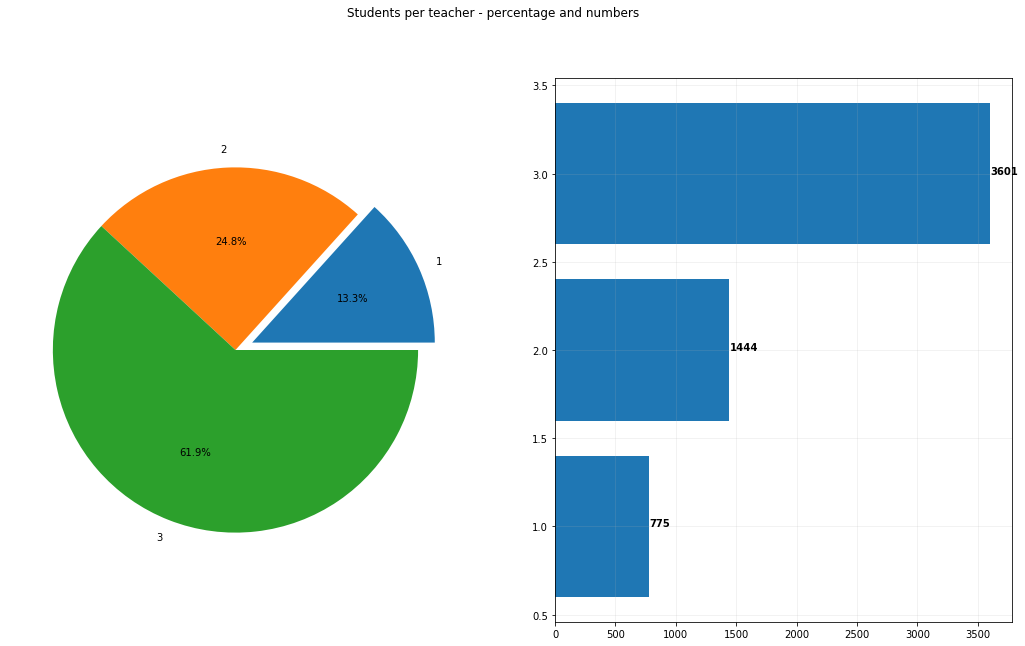

In [8]:
# Organize the data by teacher
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Students per teacher - percentage and numbers')

ax1.pie(spt_values,
       labels=spt_labels,
        explode=(0.1,0,0),
       autopct = '%1.1f%%'
       )

ax2.barh(spt_labels, spt_values)
ax2.grid(alpha=0.2)
for i, v in enumerate(spt_values):
    ax2.text(v + 3, i + 1, str(v), color='black', fontweight='bold')

fig = plt.gcf()
fig.set_size_inches(18, 10, forward=True)

### Eliminating some records that produce noise
By observing the data we have identified a large number of records where the values per entry from difficulty to Q28 are the same. Therefore decided to eliminate those as we are assuming that a teacher cannot be 100% bad or good or mediocre in all the given questions.
- We have eliminated these records, as well as the records that have the values per entry from Q1 to Q28 equal to 0, following the same logic.

In [9]:
# Eliminate entries where difficulty to Q28 values are equal between them
# Eliminating all entries where values are equal to 0 from Q1 to Q28
# df_weq means df without equal values
df_weq = df
df_weq = df_weq[df_weq.iloc[:, 4:32].apply(lambda x: min(x) != max(x), 1)]
df_weq = df_weq[df_weq.iloc[:, 5:32].apply(lambda x: min(x) != max(x) !=0, 1)]

### Observation (1): 

Based on our assumptions and analysis, we have noticed that some questions tend to repeat. That is because the author of the questionaire wanted to make sure that the students are answering almost the same to the questions at hand. After further analysis, we identified the following as potential duplicates:

- Q5 and Q7 - 255 (1)
- Q8 and Q10 - 243 (2)
- Q13 and Q14 - 97 (3)
- Q15 and Q19 - 238 (4)
- Q16 and Q18 - 187 (5)
- Q20 and Q25 - 223 (6) 
- Q21 and Q22 - 101 (7)
- Q24 and Q26 - 281 (8) 

Therefore, an average of less than 10% (8.19%) of the entries are different than the dataset where we have applied our cleaning processes (2480)


#### Step 1: Calculate the difference between the questions that we believe are duplicates


In [10]:
df_alt = df_weq
df_alt['diff (1)'] = df_alt.apply(lambda x: x['Q5'] - x['Q7'], axis=1)
df_alt['diff (2)'] = df_alt.apply(lambda x: x['Q8'] - x['Q10'], axis=1)
df_alt['diff (3)'] = df_alt.apply(lambda x: x['Q13'] - x['Q14'], axis=1)
df_alt['diff (4)'] = df_alt.apply(lambda x: x['Q15'] - x['Q19'], axis=1)
df_alt['diff (5)'] = df_alt.apply(lambda x: x['Q16'] - x['Q18'], axis=1)
df_alt['diff (6)'] = df_alt.apply(lambda x: x['Q20'] - x['Q25'], axis=1)
df_alt['diff (7)'] = df_alt.apply(lambda x: x['Q21'] - x['Q22'], axis=1)
df_alt['diff (8)'] = df_alt.apply(lambda x: x['Q24'] - x['Q26'], axis=1)

#### Step 2: Assess how many of such entries exist where the difference is greater than 1 or -1

In [11]:
# See how many records are have all the new columns greater than 1 or lower than -1 
# This will show us how many people have answered very differently to a duplicate question

# df_alt[((df_alt['diff (1)'] < -1) | (df_alt['diff (1)'] > 1))].count()
# df_alt[((df_alt['diff (2)'] < -1) | (df_alt['diff (2)'] > 1))].count()
# df_alt[((df_alt['diff (3)'] < -1) | (df_alt['diff (3)'] > 1))].count()
# df_alt[((df_alt['diff (4)'] < -1) | (df_alt['diff (4)'] > 1))].count()
# df_alt[((df_alt['diff (5)'] < -1) | (df_alt['diff (5)'] > 1))].count()
# df_alt[((df_alt['diff (6)'] < -1) | (df_alt['diff (6)'] > 1))].count()
# df_alt[((df_alt['diff (7)'] < -1) | (df_alt['diff (7)'] > 1))].count()
# df_alt[((df_alt['diff (8)'] < -1) | (df_alt['diff (8)'] > 1))].count()

#### Step 3: Condensing such questions by applying the average between them

In [12]:
df_alt['Q5 - Q7'] = df_alt.apply(lambda x: int(round((x['Q5'] + x['Q7']) / 2)), axis=1)
df_alt['Q8 - Q10'] = df_alt.apply(lambda x: int(round((x['Q8'] + x['Q10']) / 2)), axis=1)
df_alt['Q13 - Q14'] = df_alt.apply(lambda x: int(round((x['Q13'] + x['Q14']) / 2)), axis=1)
df_alt['Q15 - Q19'] = df_alt.apply(lambda x: int(round((x['Q15'] + x['Q19']) / 2)), axis=1)
df_alt['Q16 - Q18'] = df_alt.apply(lambda x: int(round((x['Q16'] + x['Q18']) / 2)), axis=1)
df_alt['Q20 - Q25'] = df_alt.apply(lambda x: int(round((x['Q20'] + x['Q25']) / 2)), axis=1)
df_alt['Q21 - Q22'] = df_alt.apply(lambda x: int(round((x['Q21'] + x['Q22']) / 2)), axis=1)
df_alt['Q24 - Q26'] = df_alt.apply(lambda x: int(round((x['Q24'] + x['Q26']) / 2)), axis=1)

In [13]:
df_alt[['Q5', 'Q7', 'Q8', 'Q10', 'Q13', 'Q14', 'Q15', 'Q19', 'Q16', 'Q18', 'Q20', 'Q25', 'Q21', 'Q22', 'Q24', 'Q26']].sum()

Q5      247
Q7       20
Q8     -123
Q10     172
Q13    1031
Q14    1299
Q15    1274
Q19    1126
Q16     612
Q18     908
Q20    1269
Q25    1403
Q21    1386
Q22    1435
Q24     577
Q26     901
dtype: int64

#### Step 4: Eliminating unwanted columns from the dataset

In [14]:
df_alt.drop(['Q5', 'Q7', 'Q8', 'Q10', 'Q13', 'Q14', 'Q15', 'Q19', 'Q16', 
     'Q18', 'Q20', 'Q25', 'Q21', 'Q22', 'Q24', 'Q26', 'diff (1)', 
     'diff (2)', 'diff (3)', 'diff (4)', 'diff (5)', 'diff (6)', 
     'diff (7)', 'diff (8)'], axis=1, inplace=True)


### Observation (2):
After further analysis, we discovered that there are certain themes in the questionaire that tend to repeat. Such themes are: 

- Course Satisfaction
- Preparation/Organization
- Competence/Ethics
- Ethics/Commitment

Grouping the question per identified theme led us to this:
- Course Satisfaction - Q3, Q5-Q7, Q9, Q11, Q8-Q10 (5)
- Preparation/Organization - Q1, Q2, Q4, Q15-Q19, Q24-Q26 (5)
- Competence/Ethics - Q6, Q28, Q17, Q13-Q14, Q16-Q18 (5)
- Helpfulness/Commitment - Q12, Q27, Q23, Q21-Q22, Q20-Q25 (5)

The next step is to condense the questions further into themes to ease the statistics that we are performing on them.

This process will be done similarly to how we have condensed the presumed duplicate questions: calculating the mean per row for the questions which belong to a certain theme.

In [15]:
df_alt['C.S.'] = df_alt.apply(lambda x: round((x['Q3'] + x['Q5 - Q7'] + x['Q9'] + x['Q11'] + x['Q8 - Q10']) / 5, 2), axis=1)
df_alt['P.O.'] = df_alt.apply(lambda x: round((x['Q1'] + x['Q2'] + x['Q4'] + x['Q15 - Q19'] + x['Q24 - Q26']) / 5, 2), axis=1)
df_alt['C.E.'] = df_alt.apply(lambda x: round((x['Q6'] + x['Q13 - Q14'] + x['Q16 - Q18'] + x['Q17'] + x['Q28']) / 5, 2), axis=1)
df_alt['H.C.'] = df_alt.apply(lambda x: round((x['Q12'] + x['Q20 - Q25'] + x['Q21 - Q22'] + x['Q23'] + x['Q27']) / 5, 2), axis=1)

In [16]:
df_alt = df_alt[['instr', 'class', 'no.taken','attendance', 'difficulty', 'C.S.', 'P.O.', 'C.E.', 'H.C.']]

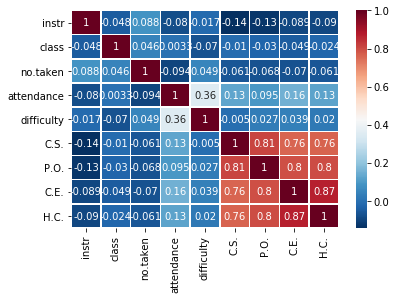

In [17]:
pearsoncorr = df_alt.corr(method='pearson')
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

### Method to divide the dataset into classes
This will return a dictionary with the entries grouped per class

In [18]:
def divide_by_class(df):
    # Create a list of classes
    classes = df['class'].unique()
    # Create a data frame dictionary to store the entries per class for quick access
    # dfdc is dataframe dictionary divided per class
    dfdc = {elem : pd.DataFrame for elem in classes}
    for key in dfdc.keys():
        dfdc[key] = df[:][df['class'] == key]
        dfdc[key]['size'] = float(dfdc[key]['class'].count()) 
    return dfdc

In [19]:
def divide_by_teacher(df):
    # Create a list of teachers
    classes = df['instr'].unique()
    # Create a data frame dictionary to store the entries per class for quick access
    # dfdc is dataframe dictionary divided per class
    dfdc = {elem : pd.DataFrame for elem in classes}
    for key in dfdc.keys():
        dfdc[key] = df[:][df['instr'] == key]
    return dfdc

In [20]:
dfdc_class = divide_by_class(df_alt)
dfdc_instr = divide_by_teacher(df_alt)

### Create a method that plots all the classes while calculating the pearson coefficient

In [21]:
def pearson_coefficient_by_class(dfd):
    for key in dfd.keys():
        print(key)
        fig, ax = plt.subplots(ncols=1,figsize=(10,8))
        pearsoncorr = dfd[key].corr(method='pearson')
        sb.heatmap(pearsoncorr, 
        xticklabels=pearsoncorr.columns,
        yticklabels=pearsoncorr.columns,
        cmap='RdBu_r',
        annot=True,
        linewidth=0.5)
        plt.show()

1


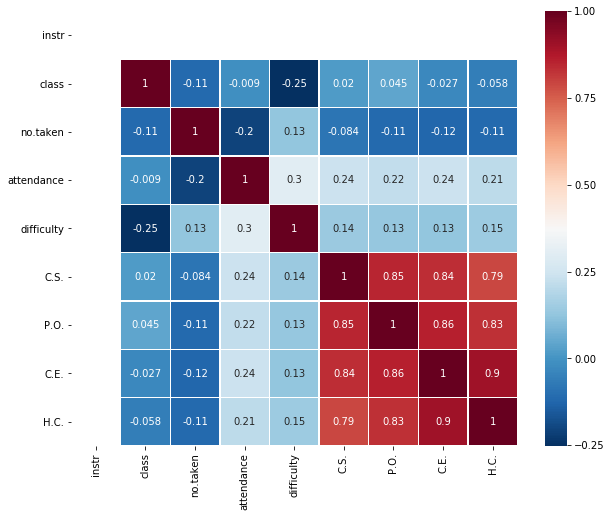

2


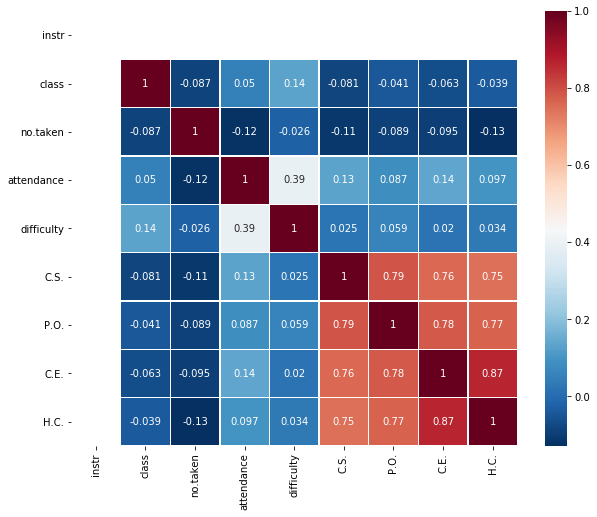

3


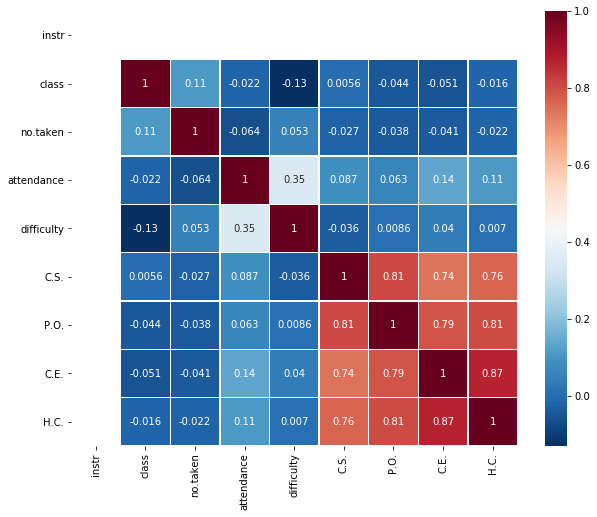

In [22]:
pearson_coefficient_by_class(dfdc_instr)

2


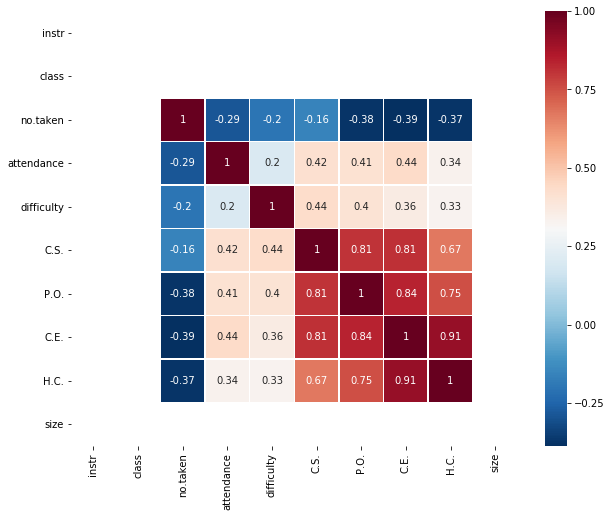

7


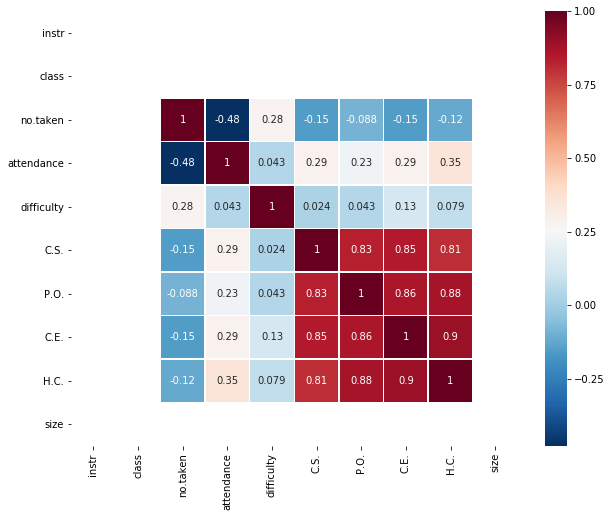

10


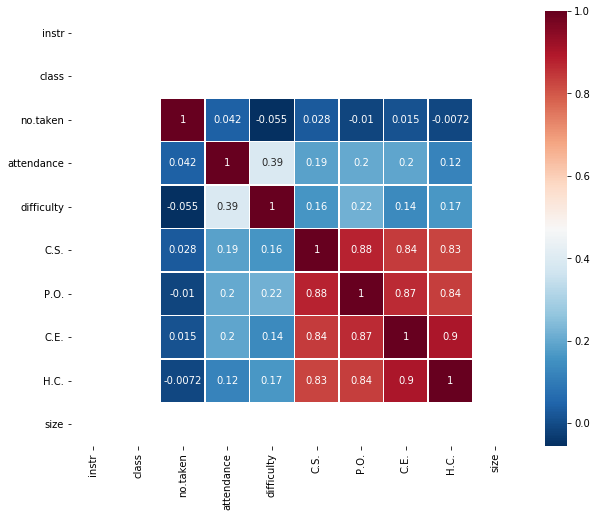

1


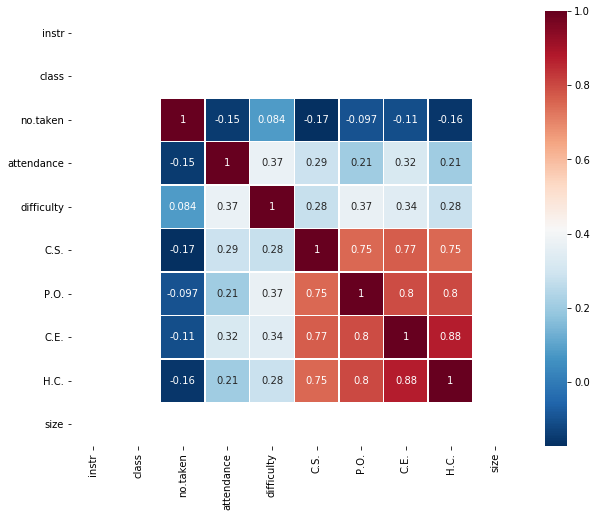

6


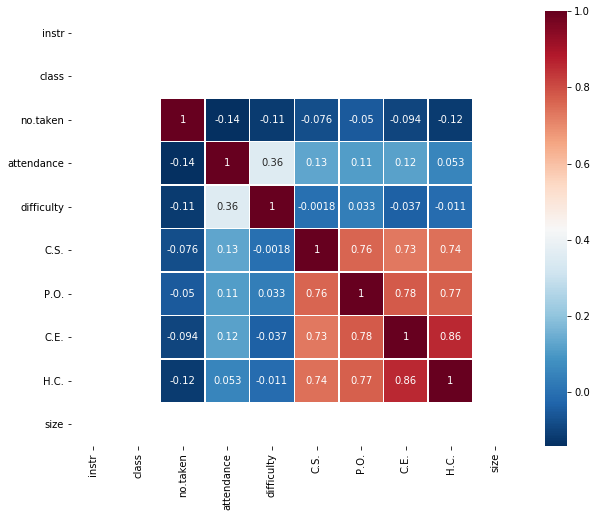

11


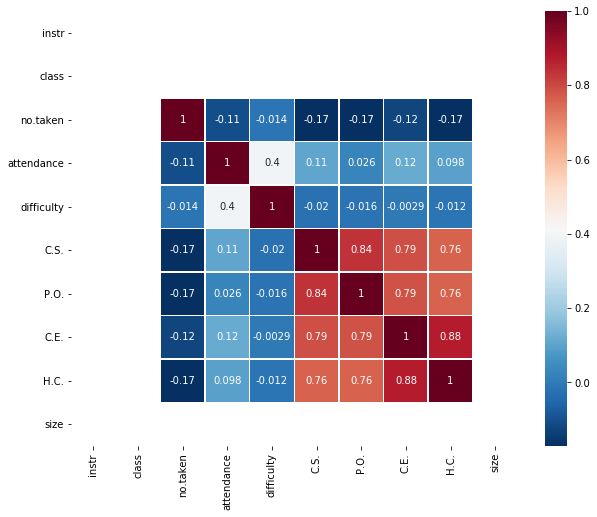

13


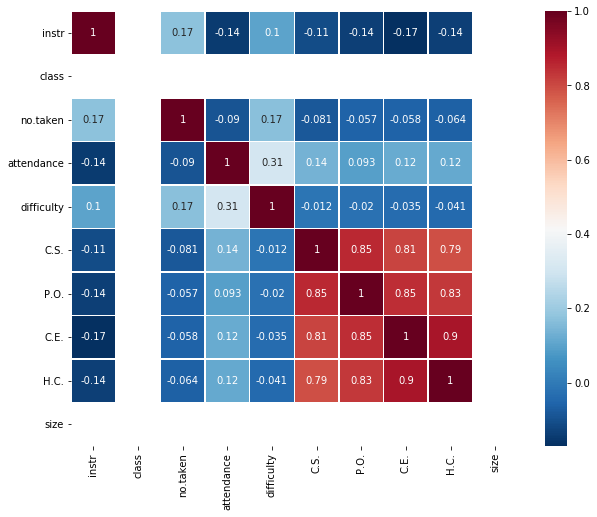

3


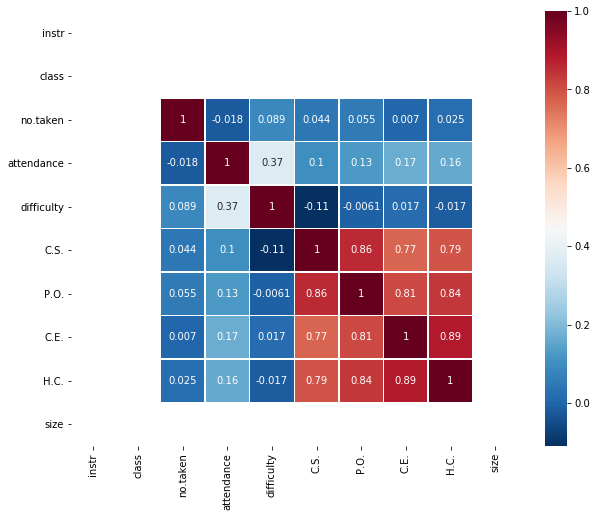

4


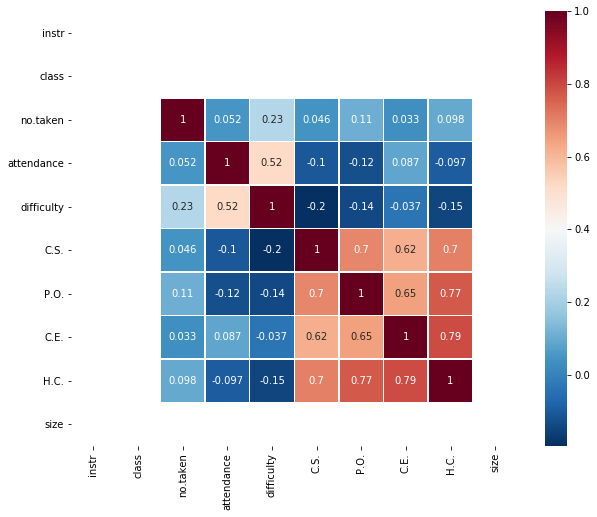

5


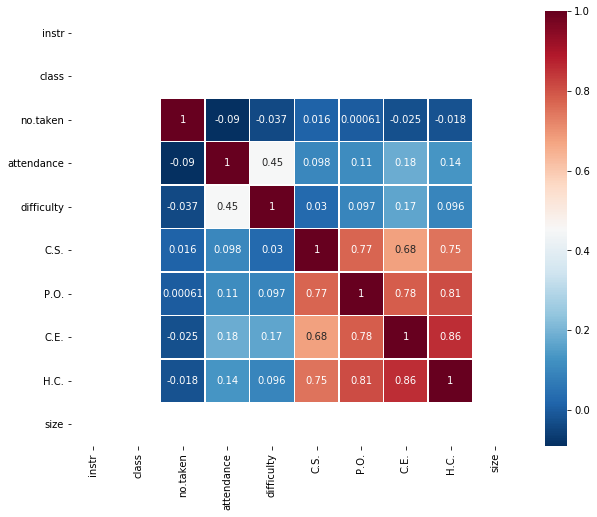

8


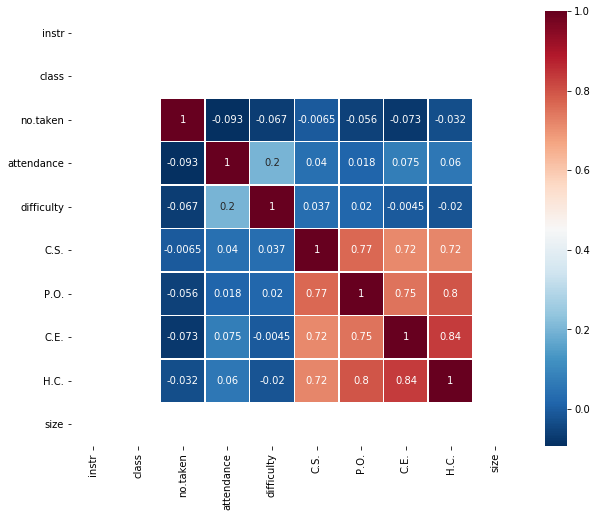

9


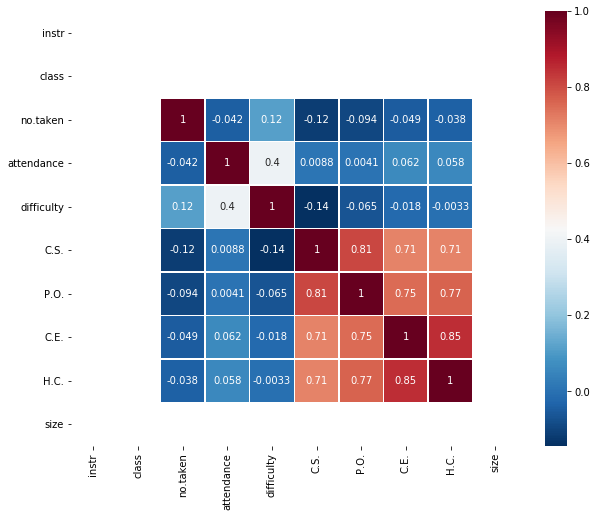

12


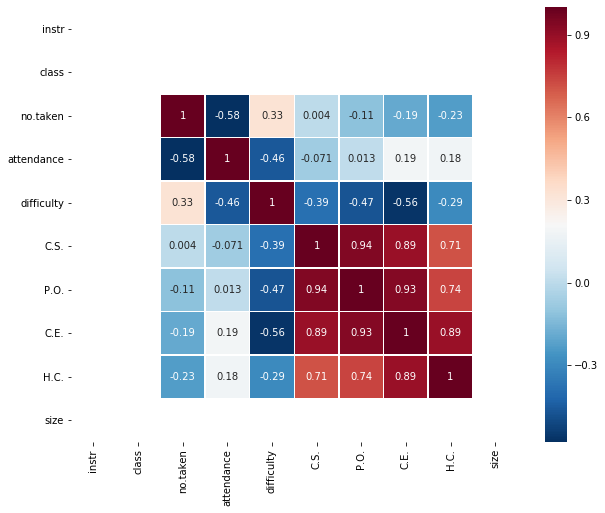

In [23]:
pearson_coefficient_by_class(dfdc_class)

### Observation:
1) By analyzing the dataset divided by teacher and by using pearsons correlational coefficient, we have uncovered that there is a strong relationship between Competence/Ethics theme and Helpfulness/Commitment. Ergo, the better a teacher masters his subject and has ethics, the more that teacher is willing to help the students.

2) Another observation is that the more a teacher has scored in Preparation/Organization theme, the more likely he is to have a high or low competence and ethics.

3) Lastly, the more prepared a teacher is for his class, the higher course satisfaction the students will have.

This heatmap shows various points where there is a correlation between the 4 different themes, however we have limited ourselves by only observing 3 of such occurances, the highest ones

In [24]:
dfdc_instr[1].describe()

,instr,class,no.taken,attendance,difficulty,C.S.,P.O.,C.E.,H.C.
count,286.0,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,1.0,7.884615,1.129371,2.185315,0.195804,0.397902,0.270629,0.495105,0.356643
std,0.0,2.737134,0.436145,1.410709,1.198003,1.009636,0.975297,1.017277,1.045932
min,1.0,2.000000,1.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,1.0,7.000000,1.000000,1.000000,0.000000,-0.200000,-0.400000,0.000000,-0.200000
50%,1.0,10.000000,1.000000,2.000000,0.000000,0.600000,0.400000,0.600000,0.400000
75%,1.0,10.000000,1.000000,3.000000,1.000000,1.200000,1.000000,1.200000,1.200000
max,1.0,10.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [25]:
dfdc_instr[2].describe()

,instr,class,no.taken,attendance,difficulty,C.S.,P.O.,C.E.,H.C.
count,618.0,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,2.0,7.330097,1.122977,2.008091,-0.255663,0.339159,0.309061,0.619094,0.524272
std,0.0,4.005802,0.383310,1.414763,1.075441,0.899948,0.905350,0.896721,0.910639
min,2.0,1.000000,1.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,2.0,6.000000,1.000000,1.000000,-1.000000,-0.150000,-0.200000,0.200000,0.000000
50%,2.0,6.000000,1.000000,2.000000,0.000000,0.400000,0.400000,0.800000,0.600000
75%,2.0,11.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.200000,1.000000
max,2.0,13.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [26]:
dfdc_instr[3].describe()

,instr,class,no.taken,attendance,difficulty,C.S.,P.O.,C.E.,H.C.
count,1576.0,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,3.0,7.262690,1.227792,1.848985,-0.043782,0.056472,0.005584,0.354695,0.224619
std,0.0,3.452282,0.551605,1.454071,1.316556,0.983074,0.984770,0.948397,1.005434
min,3.0,3.000000,1.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,3.0,4.000000,1.000000,0.000000,-1.000000,-0.600000,-0.600000,-0.200000,-0.400000
50%,3.0,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.400000,0.200000
75%,3.0,9.000000,1.000000,3.000000,1.000000,0.800000,0.800000,1.000000,1.000000
max,3.0,13.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [27]:
df_alt.groupby(['instr']).mean()

,class,no.taken,attendance,difficulty,C.S.,P.O.,C.E.,H.C.
instr,,,,,,,,
1,7.884615,1.129371,2.185315,0.195804,0.397902,0.270629,0.495105,0.356643
2,7.330097,1.122977,2.008091,-0.255663,0.339159,0.309061,0.619094,0.524272
3,7.262690,1.227792,1.848985,-0.043782,0.056472,0.005584,0.354695,0.224619


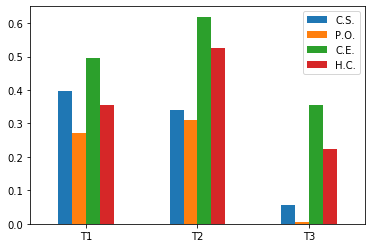

In [28]:
cs = [0.397, 0.339, 0.056]
po = [0.27,0.309, 0.005]
ce = [0.495,0.619, 0.354]
hc = [0.356, 0.524, 0.224]

index = ['T1', 'T2', 'T3']
df = pd.DataFrame({'C.S.': cs,
                   'P.O.': po,
                   'C.E.': ce,
                   'H.C.': hc
                  }, index=index)
ax = df.plot.bar(rot=0)

### Observation:
1) The more courses a teacher has, the easier the courses have been ranked by students

2) The harder a course is, the better course satisfaction the students have

3) The more competence a teacher has, the more helpful and commited he is

4) The more organized a teacher is, the more competent he is

In [28]:
df_alt.groupby(['instr', 'class']).mean()

no.taken  attendance  difficulty      C.S.      P.O.      C.E.  \
instr class                                                                   
1     2      1.150000    1.950000    0.300000  0.380000  0.280000  0.655000   
      7      1.242105    2.484211    0.905263  0.362105  0.138947  0.391579   
      10     1.052980    2.059603   -0.278146  0.425166  0.350993  0.517881   
2     1      1.163934    1.983607   -0.434426  0.414754  0.337705  0.629508   
      6      1.142241    1.892241   -0.431034  0.404310  0.354310  0.731034   
      11     1.100962    2.129808    0.192308  0.252885  0.250000  0.478846   
      13     1.035714    2.089286   -0.803571  0.225000  0.278571  0.653571   
3     3      1.168285    1.647249    0.113269  0.009061  0.054369  0.332039   
      4      1.289720    1.813084    0.000000 -0.213084 -0.407477  0.166355   
      5      1.099668    1.903654    0.056478  0.055814  0.211296  0.449169   
      8      1.224756    2.322476    0.140065  0.187622 -0.030619  0.496417   
      9      1.325581    1.813953   -0.158915  0.220930  0.037209  0.416279   
      12     1.214286    2.285714    0.000000  0.528571  0.614286  0.828571   
      13     1.321429    1.517857   -0.439286 -0.106429 -0.131429  0.114286   

                 H.C.  
instr class            
1     2      0.555000  
      7      0.301053  
      10     0.339073  
2     1      0.550820  
      6      0.567241  
      11     0.475000  
      13     0.471429  
3     3      0.216181  
      4     -0.063551  
      5      0.224585  
      8      0.407818  
      9      0.323256  
      12     0.657143  
      13     0.030714

In [29]:
df_alt.describe()

,instr,class,no.taken,attendance,difficulty,C.S.,P.O.,C.E.,H.C.
count,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000,2480.000000
mean,2.520161,7.351210,1.190323,1.927419,-0.068952,0.166290,0.111774,0.436774,0.314516
std,0.693132,3.530601,0.504185,1.443425,1.253508,0.976774,0.974308,0.950541,0.995358
min,1.000000,1.000000,1.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,2.000000,5.000000,1.000000,1.000000,-1.000000,-0.400000,-0.600000,0.000000,-0.200000
50%,3.000000,8.000000,1.000000,2.000000,0.000000,0.200000,0.200000,0.600000,0.400000
75%,3.000000,10.000000,1.000000,3.000000,1.000000,0.850000,0.800000,1.000000,1.000000
max,3.000000,13.000000,3.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [31]:
df_alt


,instr,class,no.taken,attendance,difficulty,C.S.,P.O.,C.E.,H.C.
8,1,2,1,1,0,1.2,1.0,1.0,1.0
15,1,2,1,3,1,1.8,1.6,1.8,1.6
23,1,2,1,2,1,0.2,0.8,0.6,1.4
25,1,2,1,0,-1,-1.0,-1.4,-1.0,-1.0
26,1,2,1,1,-1,1.2,-0.4,2.0,2.0
29,1,2,1,3,0,1.0,0.8,0.8,0.2
32,1,2,1,2,1,1.0,0.6,1.0,1.0
34,1,2,1,2,0,-1.6,-1.6,-1.0,-1.0
35,1,2,1,3,1,0.0,-0.2,0.0,-0.4
40,1,2,1,1,0,1.8,1.2,1.2,1.0


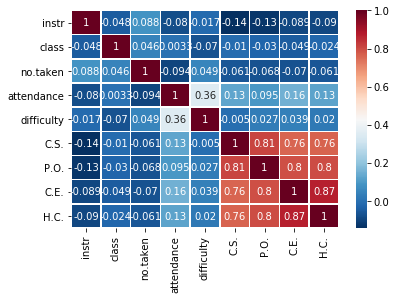

In [32]:
pearsoncorr = df_alt.corr(method='pearson')
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [34]:
df_rank

,class,no.taken,attendance,difficulty,C.S.,P.O.,C.E.,H.C.
instr,,,,,,,,
1,7.884615,1.129371,2.185315,0.195804,0.397902,0.270629,0.495105,0.356643
2,7.330097,1.122977,2.008091,-0.255663,0.339159,0.309061,0.619094,0.524272
3,7.262690,1.227792,1.848985,-0.043782,0.056472,0.005584,0.354695,0.224619


In [45]:
df_rank['Rank diff.'] = df_rank['difficulty'].rank()

In [46]:
df_rank

,difficulty,C.S.,P.O.,C.E.,H.C.,Rank C.S,Rank P.O.,Rank C.E.,Rank H.C.,Rank diff.
instr,,,,,,,,,,
1,0.195804,0.397902,0.270629,0.495105,0.356643,3.0,2.0,2.0,2.0,3.0
2,-0.255663,0.339159,0.309061,0.619094,0.524272,2.0,3.0,3.0,3.0,1.0
3,-0.043782,0.056472,0.005584,0.354695,0.224619,1.0,1.0,1.0,1.0,2.0


In [49]:
df_rank.drop(['difficulty'], axis=1, inplace=True)

In [50]:
df_rank

,Rank C.S,Rank P.O.,Rank C.E.,Rank H.C.,Rank diff.
instr,,,,,
1,3.0,2.0,2.0,2.0,3.0
2,2.0,3.0,3.0,3.0,1.0
3,1.0,1.0,1.0,1.0,2.0
